In [9]:
#Import Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the data
state_data = Path("../Resources/state_sales.xlsx")

#Read the data
read_state = pd.read_excel(state_data)
read_state

,Year,State,FAH,FAFH,Total constant dollar food sales
0,1997,Alabama,4469.228516,2784.981934,7254.210449
1,1998,Alabama,4524.197266,2901.213623,7425.411133
2,1999,Alabama,4733.012207,3036.594238,7769.606445
3,2000,Alabama,4804.239746,3262.472656,8066.712402
4,2001,Alabama,4822.866699,3038.350830,7861.217773
...,...,...,...,...,...
1219,2016,Wyoming,641.394897,645.485962,1286.880859
1220,2017,Wyoming,615.267395,663.478088,1278.745483
1221,2018,Wyoming,649.797852,691.046997,1340.844849
1222,2019,Wyoming,664.854492,705.335571,1370.190063


In [3]:
#Narrow down the data series into Delaware, Maryland, Virginia, North Carolina, Pennsylvania
east_coast = read_state.loc[(read_state['State'] == "Delaware") | (read_state['State'] == "Maryland") | 
                            (read_state['State'] == "Virginia") | (read_state['State'] == "North Carolina") |
                            (read_state['State'] == "Pennsylvania"),:]

#Narrow down to the past decade. Consists of 2010-2020. USDA Site says it was updated 5/11/23 but still missing 2.5 years
east_coast = east_coast.loc[(read_state['Year'] >= 2010) ,:]

east_coast.head()

,Year,State,FAH,FAFH,Total constant dollar food sales
181,2010,Delaware,998.421082,845.679199,1844.100342
182,2011,Delaware,994.249023,879.502991,1873.751953
183,2012,Delaware,1007.126770,905.515747,1912.642578
184,2013,Delaware,985.797363,926.745605,1912.542969
185,2014,Delaware,975.774048,987.294373,1963.068359


In [4]:
delaware_df = east_coast.loc[east_coast["State"] == "Delaware",:]
maryland_df = east_coast.loc[east_coast["State"] == "Maryland",:]
virginia_df = east_coast.loc[east_coast["State"] == "Virginia",:]
north_carolina_df = east_coast.loc[east_coast["State"] == "North Carolina",:]
pa_df = east_coast.loc[east_coast["State"] == "Pennsylvania",:]

In [5]:
#Make a lineplot showing the FAFH values fro each state
#Each state has different x_"State" and y_"state"
x_del = delaware_df["Year"]
y_del = delaware_df["FAFH"]
x_mary = maryland_df["Year"]
y_mary = maryland_df["FAFH"]
x_virg = virginia_df["Year"]
y_virg = virginia_df["FAFH"]
x_north = north_carolina_df["Year"]
y_north = north_carolina_df["FAFH"]
x_pa = pa_df["Year"]
y_pa = pa_df["FAFH"]

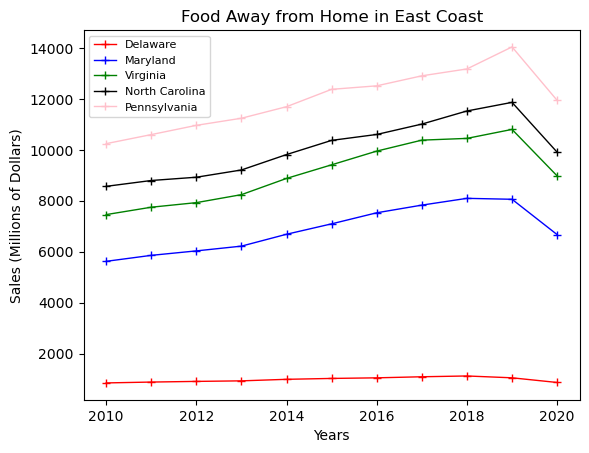

In [6]:
#Making the plot

plt.plot(x_del, y_del,marker="+",color="red", linewidth=1, label="Delaware")
plt.plot(x_mary, y_mary,marker="+",color="blue", linewidth=1, label="Maryland")
plt.plot(x_virg, y_virg,marker="+",color="green", linewidth=1, label="Virginia")
plt.plot(x_north, y_north,marker="+",color="black", linewidth=1, label="North Carolina")
plt.plot(x_pa, y_pa,marker="+",color="pink", linewidth=1, label="Pennsylvania")

plt.xlabel("Years")
plt.ylabel("Sales (Millions of Dollars)")
plt.title("Food Away from Home in East Coast")
plt.legend(loc="best", fontsize="8")

plt.savefig("../output_data/EastCoastFAFH.png")
plt.show()

In [ ]:
# Creating a Bar Chart for each state to compare spending in FAH vs FAFH


In [7]:
# Finding the average sales of FAFH for each state
del_avg = round(y_del.mean())
mary_avg = round(y_mary.mean())
virg_avg = round(y_virg.mean())
north_avg = round(y_north.mean())
pa_avg = round(y_pa.mean())

In [8]:
state_avg_fafh = pd.DataFrame ({
    "State" : ["Delaware", "Maryland", "North Carolina", "Pennsylvania", "Virginia"],
    "Average Food Away From Home Sales (Millions of US Dollars)" : [del_avg, mary_avg, north_avg, pa_avg,virg_avg]
    })

state_avg_fafh

,State,Average Food Away From Home Sales (Millions of US Dollars)
0,Delaware,975
1,Maryland,6881
2,North Carolina,10055
3,Pennsylvania,11974
4,Virginia,9112
